# Chapter X: Running deterministic and stochastic simulations with Tellurium and libRoadRunner 

<br>
<div align='center'>
    <figure>
    <img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/tellurium-utilities.png" width="75%" style="padding: 20px">
        <figcaption>Tellurium is an integrated modeling environment which makes available libraries to support biochemical model building and simulation. Reproduced from [cite Tellurium paper/docs].</figcaption>
    </figure>
</div>

## How does numerical simulation help us model network kinetics?

Model simulation involves computational execution of the mathematics describing a model to generate predictions of its
dynamic behavior. We urge modelers to implement numerical methods—such as a custom integration method—separately
from representations of biological systems, so that each of them can be independently reused. When performing stochastic
simulations that use a pseudo-random number generator algo- rithm, preserve a precise definition of the algorithm. Execute an ensemble of simulation runs with different seeds to estimate the distributions of species population trajectories and predictions that depend on them. Make the ensembles large enough to accurately characterize properties of the distributions. Record the seeds used by these simulations or a reproducible methodfor obtaining the seeds. If multiple distinct sets of input parameters are analyzed, repeat the process of estimating the distribution of predictions for each parameter set.

<ul>
  <li>Provides a method to approximate analytical solutions for complex (often non-linear) systems</li>
  <li>Kinetic laws describe the rates of change of species in the system, which can be modeled mathematically</li>
  <li>For a sufficiently large network, simulators must be efficient and perform rapid numerical integration</li>
</ul>


In [ ]:
import tellurium as te # Python-based modeling environment for kinetic models
import roadrunner as rr # High-performance simulation and analysis library
import numpy as np # Scientific computing package
import random # Generate random numbers 
import matplotlib.pylab as plt # Additional Python plotting utilities

## Specifying a detailed simulation experiment

Follow the minimum information about & simulation experiment (MIASE) guidelines to determine which software and data to
archive (Waltemath et al., 2011a). The simulation experiment description markup language (SED-ML) can encode simulation
descriptions, including simulator settings and parameter modifications, and facilitate exchange between standard-compatible
tools (Waltemath and Le Novere, 2013). We recommend using the kinetic simulation algorithm ontology (KiSAO) (Courtot
et al., 2011) to annotate SED-ML documents. Many simulators are compatible with these standards, including COPASI and
Java web simulation online (JWS Online), an online platform that hosts models, simulation programs, and data (Olivier and
Snoep, 2004). libRoadRunner provides high-performance simulation of multiple numerical integration algorithms (Somogyi
et al., 2015), and Tellurium provides a Pythonic interface to access libRoadRunner, SED-ML, and additional analysis capabilities (Choi et al., 2018). 

## Simulating a complex model of a true biological system

Using the model describe in Chapter X, we will demonstrate both deterministic and stochastic simulation studies.

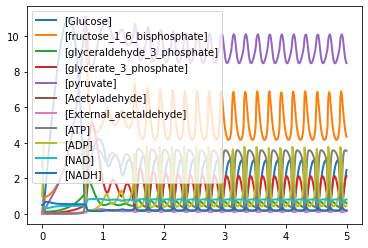

In [1]:
import matplotlib.pyplot as plt
import tellurium as te

wolf = te.loada('Jana_WolfGlycolysis.antimony')
data = wolf.simulate(0, 5, 400)
wolf.plot()

## Storing simulation results

To allow independent researchers to analyze published simulation results and perform new analyses and mathematical manipulations of the results without requiring that they reproduce the entire model, unprocessed results should be preserved for dissemination. Unprocessed results of simulations that might be used in published findings should be temporarily saved; results that are used in published findings should be archived so they can be shared with independent investigators.

Share the reduced data that are presented in published graphs and tables to enable independent analyses by other investigators. If these data are not shared, researchers must devote substantial effort to transcribe data from figures. Results and data should be stored in structured and space-efficient formats with annotations that clearly describe the data. Unlike traditional figures, interactive graphics provide access to the data presented by mouse over. However, to comprehensively share plotted data, archive formatted files containing the raw data, the graphics files, the code that generated the graphics, and documentation that relates the data to the figures. Providing the source data and the code used to generate the published figures ensures that the figure can be readily regenerated by independent researchers or altered to improve understanding of the data [add references].

In [ ]:
import tellurium as te
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Load the model string into a RoadRunner object instance
model = te.loada(antimony_str)

# Generate deterministic results using CVODE
det_results = model.simulate (0, 200, 100, ['time', 'gen_ssRNA'])

# Set a seed value for reproducible stochastic output
model.seed = 124

plt.figure(2)
for i in range(10):
    # Reset variable concentrations to initial conditions
    model.reset()
    # Generate stochastic results using Gillespie's algorithm
    stoch_results = model.gillespie (0, 200, 100, ['time', 'gen_ssRNA'])
    # Plot stochastic simulation trajectory
    plt.plot(stoch_results['time'], stoch_results['gen_ssRNA'], linewidth=4, alpha=0.4)

# Plot deterministic results
plt.plot(det_results['time'], det_results['gen_ssRNA'], color='black', linewidth=2,)
plt.xlabel('Time')
plt.ylabel('[gen_ssRNA]')

# Save figure for Docker implementation and show
# plt.savefig('curated_k7_sars_cov2_infection_simulation.jpg', dpi = 300)
plt.show()

print(f'\nTimeseries of gen_ssRNA using fitted values for k1 and k4, and curated data for k7:')
print(det_results)


<br>
<html>
   <head>
      <title>Bibliography</title>
   </head>
   <body>
      <h1>Bibliography</h1>
      <ol>
         <li>
            <p>K. Choi et al., <cite>Tellurium: An extensible python-based modeling environment for systems and synthetic biology</cite>, Biosystems, vol. 171, pp. 74–79, Sep. 2018.</p>
         </li>
         <li>
            <p>E. T. Somogyi et al., <cite>libRoadRunner: a high performance SBML simulation and analysis library.,</cite>, Bioinformatics, vol. 31, no. 20, pp. 3315–21, Oct. 2015.</p>         
          <li>
            <p>L. P. Smith, F. T. Bergmann, D. Chandran, and H. M. Sauro, <cite>Antimony: a modular model definition language</cite>, Bioinformatics, vol. 25, no. 18, pp. 2452–2454, Sep. 2009.</p>
         </li>
         <li>
            <p>K. Choi, L. P. Smith, J. K. Medley, and H. M. Sauro, <cite>phraSED-ML: a paraphrased, human-readable adaptation of SED-ML</cite>, J. Bioinform. Comput. Biol., vol. 14, no. 06, Dec. 2016.</p>
         </li>
         <li>
            <p>J. Wolf, H. Y. Sohn, R. Heinrich, and H. Kuriyama, <cite>Mathematical analysis of a mechanism for autonomous metabolic oscillations in continuous culture of Saccharomyces cerevisiae</cite>, FEBS Lett., vol. 499, no. 3, pp. 230–234, Jun. 2001.</p>
         </li>
      </ol>
   </body>
</html>